In [1]:
import numpy as np
import heapq
from collections import deque 

In [2]:
# Day 1
# Part A
calories = [0]
with open('day1.txt') as fid:
    for line in fid:
        if line[0] == '\n':
            calories.append(0)
            continue
        calories[-1] += int(line[:-1])
calories.sort()
print(calories[-1])
# Part B
print(sum(calories[-3:]))

69795
208437


In [3]:
# Day 2
# Part A
l, r = np.loadtxt('day2.txt', dtype=int, unpack=True,
                  converters={0:lambda s: {b'A':1, b'B':2, b'C':3}[s], 1:lambda s: {b'X':1, b'Y':2, b'Z':3}[s]})
print(sum((((r + 3 - l) % 3 + 1) % 3)*3 + r))
# Part B
print(sum((r - 1)*3 +  (l + r) % 3 + 1))


11767
13886


In [4]:
# Day 3
# Part A
with open('day3.txt') as fid:
    all_lines = fid.readlines()
priorities = 0
for line in all_lines:
    n = (len(line) - 1)//2
    common_letter = (set(line[:n]) & set(line[n:-1])).pop()
    priorities += ord(common_letter) - (96 if common_letter.islower() else 38)
print(priorities)
# Part B
priorities = 0
for j in range(len(all_lines)//3):
    common_letter = (set(all_lines[3*j + 0][:-1]) & set(all_lines[3*j + 1][:-1]) & set(all_lines[3*j + 2][:-1])).pop()
    priorities += ord(common_letter) - (96 if common_letter.islower() else 38)
print(priorities)
        

7824
2798


In [5]:
# Day 4
# Part A
with open('day4.txt') as fid:
    data = np.array([list(map(int, couple.split('-'))) for couple in fid.read().strip().replace(',','-').split('\n')], dtype=int)
print((((data[:,3] >= data[:,1]) & (data[:,2] <= data[:,0])) | ((data[:,3] <= data[:,1]) & (data[:,2] >= data[:,0]))).sum())
# Part B
print((np.maximum(data[:,0], data[:,2]) <= np.minimum(data[:,1], data[:,3])).sum())

602
891


In [6]:
# Day 5
# Part A
with open('day5.txt') as fid:
    stacks_ini_lines, movement = fid.read().split('\n\n')
stacks = ['']*10
for line in stacks_ini_lines.split('\n')[:-1]:
    for j in range(1, 10):
        stacks[j] += line[4*(j - 1) + 1]
stacks = [s.strip()[::-1] for s in stacks]

def get_top_crates_after_movement(stacks, movements, order=1):
    for line in movement.strip().split('\n'):
        tmp = line.split()
        n, fro, to = int(tmp[1]), int(tmp[3]), int(tmp[5])
        stacks[fro], crates_on_crane = stacks[fro][:-n], stacks[fro][-n:]
        stacks[to] += crates_on_crane[::order]
    return ''.join([stacks[j][-1] for j in range(1, 10)])

for order in [-1, 1]:
    print(get_top_crates_after_movement([s for s in stacks], movement.strip().split('\n'), order))

BSDMQFLSP
PGSQBFLDP


In [7]:
# Day 6
# Part A
with open('day6.txt') as fid:
    data = fid.read()
for i in range(4, len(data)):
    if len(set(data[i-4:i])) == 4:
        break
print(i)
# Part B
for i in range(14, len(data)):
    if len(set(data[i-14:i])) == 14:
        break
print(i)

1647
2447


In [8]:
# Day 6, fastest version: 642 µs vs 2.01 ms 
from collections import defaultdict
with open('day6.txt', 'rb') as f:
    data = f.read()
def index_of_unique_substring(occurences=1):
    n_unique = 0
    last_index_of_letter = defaultdict(lambda: -occurences)
    for i, c in enumerate(data):
        last_index, last_index_of_letter[c] = last_index_of_letter[c], i
        n_unique = n_unique + 1 if last_index < i - n_unique else i - last_index
        if n_unique == occurences:
            return i + 1
# Part A
print(index_of_unique_substring(4))
# Part B
print(index_of_unique_substring(14))

1647
2447


In [9]:
# Day 7
# Part A
with open('day7.txt') as fid:
    commands = fid.read().strip().split('\n')[::-1]
all_dir = []
path = []
while (commands):
    cmd = commands.pop()
    if cmd[:4] == '$ cd':
        name = cmd[5:]
        if name == '..':
            path.pop()
        elif name == '/':
            path.append('root')
        else:
            path.append(name)
    elif cmd[:4] == '$ ls':
        size_in_dir = 0
        while commands and commands[-1][0] != '$':
            cmd = commands.pop()        
            int_or_dir, name = cmd.split()
            if int_or_dir != 'dir':
                size_in_dir += int(int_or_dir)
        level = len(path) - 1
        while (level >= len(all_dir)):
            all_dir.append(defaultdict(int))
        all_dir[level]['/'.join(path)] = size_in_dir

for level in range(len(all_dir) - 1, 0, -1):
    for key, val in all_dir[level].items():
        parent = key[:key.rfind('/')]
        all_dir[level - 1][parent] += val

single_dict = {key:val for d in all_dir for key,val in d.items()}

print(sum([val for val in single_dict.values() if val <= 100000]))

# Part B
space_needed = 30000000 - (70000000 - single_dict['root'])
diff = single_dict['root'] - space_needed
for key, val in single_dict.items():
    newdiff = val - space_needed
    if newdiff > 0 and newdiff < diff:
        diff = newdiff
print(diff + space_needed)

1232307
7268994


In [82]:
# Day 8
# Part A
forrest = np.loadtxt('day8.txt', dtype=int, converters={0:lambda s: [int(c) - 48 for c in s]})
visible = np.zeros(forrest.shape, dtype=bool)
N = forrest.shape[0]
vislist = [np.zeros(forrest.shape, dtype=bool) for j in range(4)]
    
for jj in range(N):
    max_lft_rgt_top_bot = [-1, -1, -1, -1]
    for ii in range(N):
        for index_max, (j, i) in enumerate([(jj, ii), (jj, N - ii - 1), (ii, jj), (N - ii - 1, jj)]):
            if forrest[j, i] > max_lft_rgt_top_bot[index_max]:
                visible[j, i] = True
                vislist[index_max][j,i] = True
                max_lft_rgt_top_bot[index_max] = forrest[j, i]

print(visible.sum().sum())

# Part B
priority_queue = []
for j in range(1, N - 1):
    for i in range(1, N - 1):
        potential = (N - j - 1)*j*(N - i - 1)*i
        heapq.heappush(priority_queue, (-potential, -forrest[j, i], i, j, 0))

while True:
    pot, height, i, j, directions_tested = heapq.heappop(priority_queue)
    if directions_tested == 0:
        for ii in range(i + 1, N):
            if forrest[j, ii] >= forrest[j, i]:
                break
        pot *= (ii - i)/(N - i - 1)
    elif directions_tested == 1:
        for ii in range(i - 1, -1, -1):
            if forrest[j, ii] >= forrest[j, i]:
                break
        pot *= (i - ii)/i
    elif directions_tested == 2:
        for jj in range(j + 1, N):
            if forrest[jj, i] >= forrest[j, i]:
                break
        pot *= (jj - j)/(N - j - 1)
    elif directions_tested == 3:
        for jj in range(j - 1, -1, -1):
            if forrest[jj, i] >= forrest[j, i]:
                break
        pot *= (j - jj)/j
    elif directions_tested == 4:
        # Done!
        #print(pot, height, i, j, directions_tested)
        print(int(-pot))
        break
#    print(directions_tested, i, j, pot, [a, b, c, d], a*b*c*d)
    directions_tested += 1
    heapq.heappush(priority_queue, (pot, height, i, j, directions_tested))



1845
230112


1845
7956
[[0 1 1 ... 0 0 1]
 [1 0 2 ... 2 2 0]
 [0 0 2 ... 0 2 0]
 ...
 [1 2 2 ... 0 2 0]
 [2 2 1 ... 0 1 1]
 [2 0 2 ... 1 2 0]]


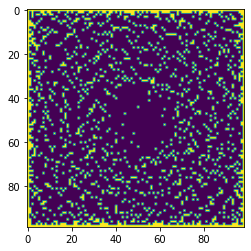

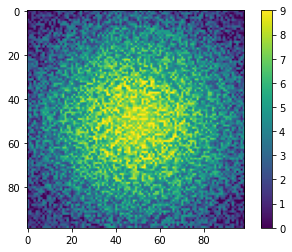

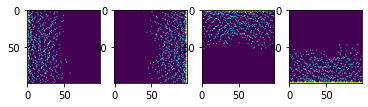

In [50]:
# Day 8
# Part A p
forrest = np.loadtxt('day8.txt', dtype=int, converters={0:lambda s: [int(c) - 48 for c in s]})
visible = np.zeros(forrest.shape, dtype=bool)
N = forrest.shape[0]
vislist = [np.zeros(forrest.shape, dtype=bool) for j in range(4)]
    
for jj in range(N):
    max_lft_rgt_top_bot = [-1, -1, -1, -1]
    for ii in range(N):
        for index_max, (j, i) in enumerate([(jj, ii), (jj, N - ii - 1), (ii, jj), (N - ii - 1, jj)]):
            if forrest[j, i] > max_lft_rgt_top_bot[index_max]:
                visible[j, i] = True
                vislist[index_max][j,i] = True
                max_lft_rgt_top_bot[index_max] = forrest[j, i]

print(visible.sum().sum())
print((visible == False).sum().sum())
import matplotlib.pyplot as plt
plt.imshow(visible)
plt.figure()
#plt.pcolormesh(range(N), range(N), forrest)
plt.imshow(forrest)
plt.colorbar()
print(forrest)
fig, axes = plt.subplots(1,4)
for j in range(4):
    axes[j].imshow(vislist[j])
    

